In [1]:
# import packages
import natsort
import glob
import numpy as np
import random
import imageio
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from skimage import io
from skimage.util import img_as_ubyte

%matplotlib inline

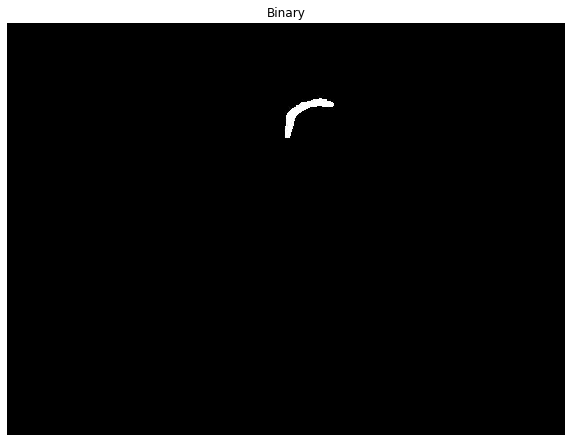

In [2]:
# load binary image data
files = glob.glob("./H1/H1_01_2_1_T*.jpg")
file_list_Binary = natsort.natsorted(files)

index = random.randint(0,len(file_list_Binary)) 

# show one sample image
fig = plt.subplots(figsize=(10, 10))
plt.imshow(imageio.imread(file_list_Binary[index]), cmap=plt.cm.gray)
plt.title('Binary')
plt.axis('off')
plt.show()

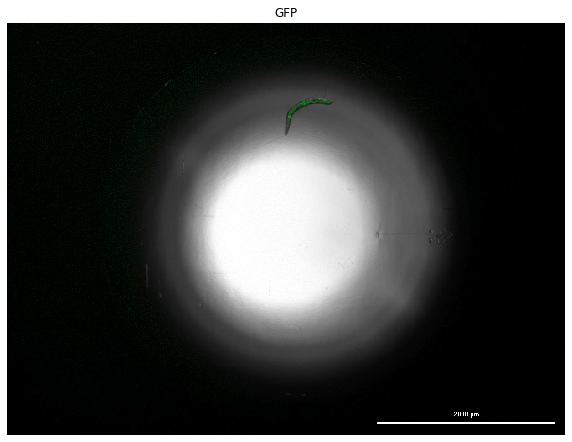

In [3]:
# load GFP image data
files = glob.glob('./H1/plate2_Dec_2019_combined_H1*.jpg')
file_list_GFP = natsort.natsorted(files)

# show one sample image
fig = plt.subplots(figsize=(10, 10))
plt.imshow(imageio.imread(file_list_GFP[index]))
plt.title('GFP')
plt.axis('off')
plt.show()

In [4]:
# GFP Extraction
GFP = np.zeros(len(file_list_Binary))
for n in range(len(file_list_Binary)):
    img_Binary = img_as_ubyte(io.imread(fname=file_list_Binary[n], as_gray=True))
    img_GFP = imageio.imread(file_list_GFP[n]) 
    GFP[n] = sum(sum(np.float32((img_GFP[:,:,1]))*cv2.normalize(img_Binary, None, 0, 1, cv2.NORM_MINMAX)))

In [5]:
# save results into dataframe
df = pd.DataFrame({'Pixel_Intensity' : GFP})

# calculate moving average
m_avg = df.iloc[:,0].rolling(window=20).mean()

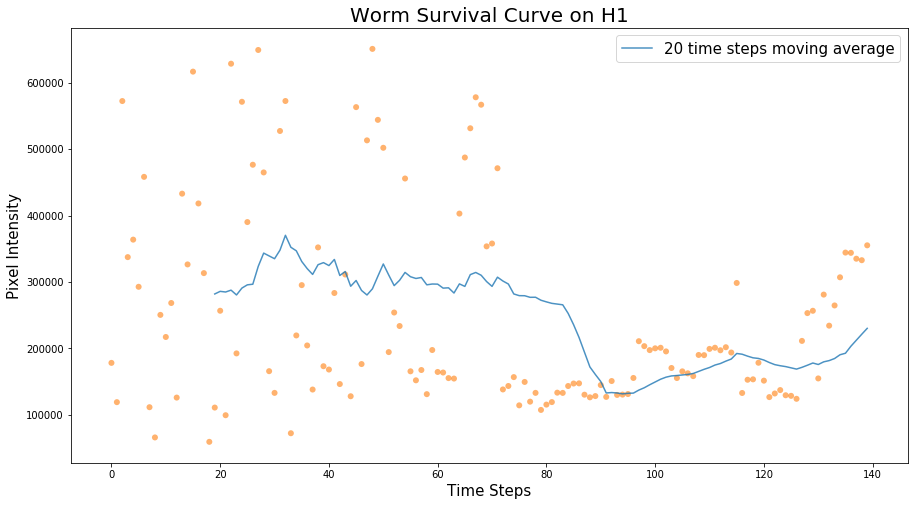

In [6]:
# plot results
fig = plt.figure(figsize=(15, 8))
plt.plot(range(len(file_list_Binary)), m_avg, 
         color='C0', alpha=0.8, label='20 time steps moving average')
plt.scatter(range(len(file_list_Binary)), GFP, c='C1',
               alpha=0.6, edgecolors='none')
plt.ylabel('Pixel Intensity', fontsize=15)
plt.xlabel('Time Steps', fontsize=15)
#plt.xlim([0, 1])
#plt.ylim([0.7, 1.3])
plt.title('Worm Survival Curve on H1', fontsize=20)
plt.legend(fontsize=15)
plt.show()